# Optional Lab: Multiple Variable Linear Regression

In this lab, you will extend the data structures and previously developed routines to support multiple features. Several routines are updated making the lab appear lengthy, but it makes minor adjustments to previous routines making it quick to review.

<a name="toc_15456_2"></a>
# 1 Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [17]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [18]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

<a name="toc_15456_3"></a>
# 2 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [19]:
# model prediction
def predict(x, w, b):
  return np.dot(x, w) + b

<a name="toc_15456_4"></a>
# 3 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [20]:
# cost function
def cost(x, y, w, b):
  m, n = x.shape
  J = 0.0
  for i in range(m):
    f_wb = np.dot(w, x[i]) + b
    error = f_wb - y[i]
    J += error ** 2
  J /= (2 * m)
  return J


<a name="toc_15456_5"></a>
# 4 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [21]:
# gradient
def gradient(x, y, w, b):
  m, n = x.shape # num of examples, num of feature
  dj_dw = np.zeros(n)
  dj_db = .0
  for i in range(m):
    f_wb = np.dot(w, x[i]) + b
    error = f_wb - y[i]
    dj_db += error
    for j in range(n):
      dj_dw += error * x[i][j]

  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

In [22]:
def gradient_descent(x, y, w, b, cost_function, gradient_function, alpha, num_iters):
  w_out = copy.deepcopy(w)
  b_out = 0
  # An array to store cost J and w's at each iteration primarily for graphing later
  J_history = []
  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w_out, b_out)
    w_out = w_out - alpha * dj_dw
    b_out = b_out - alpha * dj_db
    if i < 100000:
      J_history.append(cost_function(x, y, w_out, b_out))
  return w_out, b_out, J_history

## Result:

w: [0.2 0.2 0.2 0.2], b: -0.02662265748201333


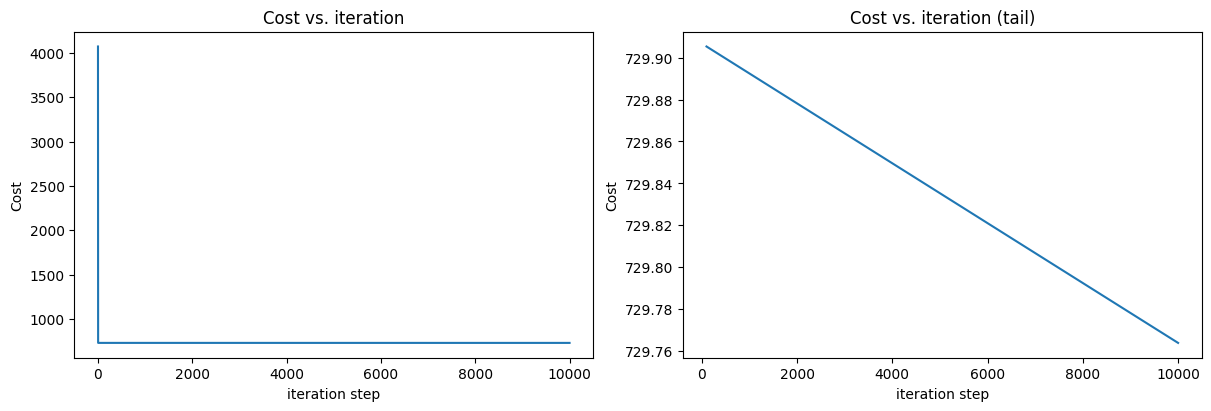

In [23]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

w, b, J_hist =gradient_descent(X_train, y_train, w = np.zeros_like(w_init), b = .0,
                 cost_function = cost, gradient_function = gradient,
                 alpha = 5.0e-7, num_iters = 10000)
print(f"w: {w}, b: {b}")
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [24]:
# predict a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.
feature = [1200, 3, 1, 40]
print(f"Predicted price: ${predict(feature, w, b)*1000:.2f}")

Predicted price: $244609.99
